<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Largest_BST_Size_(Hard).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Largest BST Size

Write a function that takes in a Binary Tree and returns the size of the largest Binary Search Tree (BST) contained in it.

Each `BinaryTree` node has an integer `value`, a `left` child node, and a `right` child node. Children nodes can either be `BinaryTree` nodes themselves or `None` / `null`.

A BST is a special type of Binary Tree whose nodes all satisfy the BST property. A node satisfies the BST property if its `value` is strictly greater than the values of every node to its left; its `value` is less than or equal to the values of every node to its right; and its children nodes are either valid `BST` nodes themselves or `None` / `null`.

Sample Input

```
tree =            20
          /                \ 
         7                 10
       /   \             /     \
      0     8           5      15
          /   \       /   \   /   \
         7     9     2     5 13   22
                   /           \
                  1             14
```



Sample Output

```
9 // The subtree rooted at 10 is the largest BST in the tree, with 9 nodes.
```



# Solution 1

In [1]:
# Time = O(n)
# Space = O(h)

# n = no. of node
# h = height of tree

def largestBstSize(tree):
	tree_info = is_valid_bst(tree)
	return tree_info['max_size']

def is_valid_bst(tree):
	if tree == None:
		return {'min':float('inf'), 'max':float('-inf'), 'size':0, 'max_size':0}
	left_tree_info = is_valid_bst(tree.left)
	right_tree_info = is_valid_bst(tree.right)
	if left_tree_info['size'] != float('-inf') and right_tree_info['size'] != float('-inf') and left_tree_info['max'] < tree.value and right_tree_info['min'] >= tree.value:
		size = left_tree_info['size'] + right_tree_info['size'] + 1
		tree_min = min(tree.value, left_tree_info['min'])
		tree_max = max(tree.value, right_tree_info['max'])
	else:
		size = float('-inf')
		tree_min = None
		tree_max = None
	max_size = max(size, left_tree_info['max_size'], right_tree_info['max_size'])
	return {'min':tree_min, 'max':tree_max, 'size':size, 'max_size':max_size}
	
# This is an input class. Do not edit.
class BinaryTree:
	def __init__(self, value):
		self.value = value
		self.left = None
		self.right = None

In [2]:
tree = BinaryTree(20)
tree.left = BinaryTree(7)
tree.right = BinaryTree(10)
tree.left.left = BinaryTree(0)
tree.left.right = BinaryTree(8)
tree.left.right.left = BinaryTree(7)
tree.left.right.right = BinaryTree(9)
tree.right.left = BinaryTree(5)
tree.right.right = BinaryTree(15)
tree.right.left.left = BinaryTree(2)
tree.right.left.right = BinaryTree(5)
tree.right.left.left.left = BinaryTree(1)
tree.right.right.left = BinaryTree(13)
tree.right.right.right = BinaryTree(22)
tree.right.right.left.right = BinaryTree(14)

In [3]:
largestBstSize(tree)

9

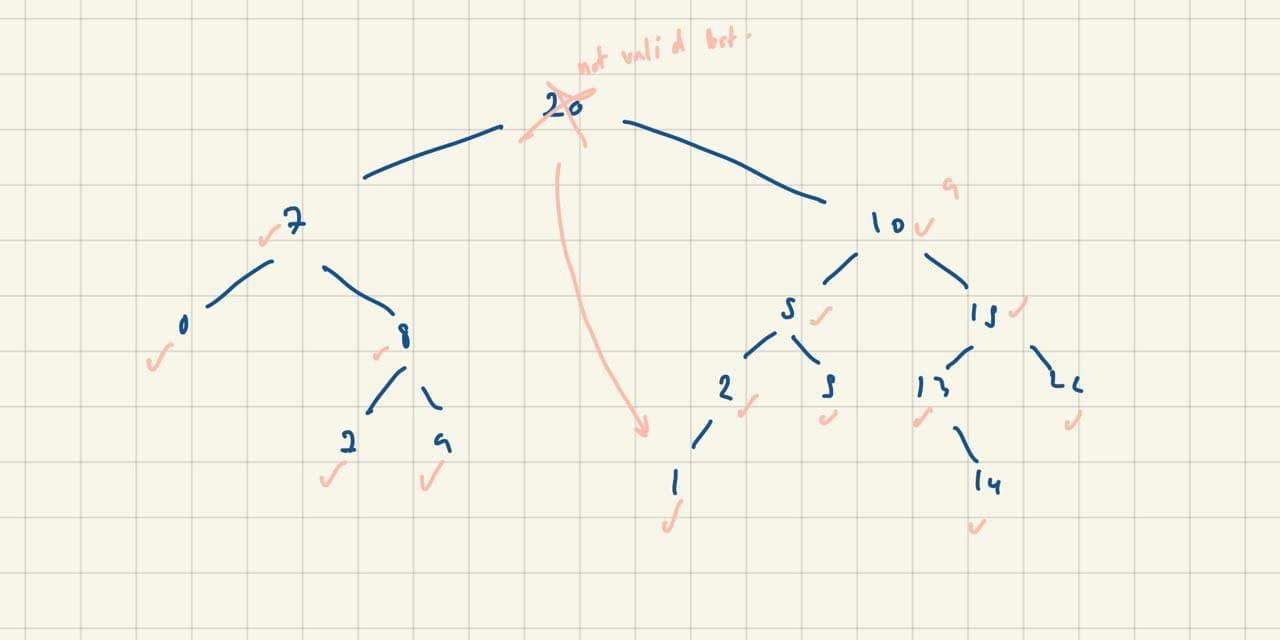

# Solution 2

same as solution 1. just refactor

In [4]:
# Time = O(n)
# Space = O(h)

# n = no. of node
# h = height of tree

def largestBstSize(tree):
  tree_info = is_valid_bst(tree)
  return tree_info.max_bst_size

def is_valid_bst(tree):
  if tree == None:
    return TreeInfo(True, float('-inf'), float('inf'), 0, 0)
  left_tree_info = is_valid_bst(tree.left)
  right_tree_info = is_valid_bst(tree.right)
  current_size = left_tree_info.current_size + right_tree_info.current_size + 1

  satisfied_bst_properties = left_tree_info.max_value < tree.value and right_tree_info.min_value >= tree.value
  is_bst = left_tree_info.is_bst and right_tree_info.is_bst and satisfied_bst_properties
  if is_bst:
      max_bst_size = current_size
  else:
      max_bst_size = max(left_tree_info.max_bst_size , right_tree_info.max_bst_size)

  min_value = min(tree.value, left_tree_info.min_value, right_tree_info.min_value)
  max_value = max(tree.value, left_tree_info.max_value, right_tree_info.max_value)

  return TreeInfo(is_bst, max_value, min_value, current_size, max_bst_size)

class TreeInfo:
  def __init__(self, is_bst, max_value, min_value, current_size, max_bst_size):
    self.is_bst = is_bst
    self.max_value = max_value
    self.min_value = min_value
    self.current_size = current_size
    self.max_bst_size = max_bst_size
  
# This is an input class. Do not edit.
class BinaryTree:
  def __init__(self, value):
    self.value = value
    self.left = None
    self.right = None

In [5]:
tree = BinaryTree(20)
tree.left = BinaryTree(7)
tree.right = BinaryTree(10)
tree.left.left = BinaryTree(0)
tree.left.right = BinaryTree(8)
tree.left.right.left = BinaryTree(7)
tree.left.right.right = BinaryTree(9)
tree.right.left = BinaryTree(5)
tree.right.right = BinaryTree(15)
tree.right.left.left = BinaryTree(2)
tree.right.left.right = BinaryTree(5)
tree.right.left.left.left = BinaryTree(1)
tree.right.right.left = BinaryTree(13)
tree.right.right.right = BinaryTree(22)
tree.right.right.left.right = BinaryTree(14)

In [6]:
largestBstSize(tree)

9